<a href="https://colab.research.google.com/github/SM-Sclass/DeepLearning/blob/main/ImageSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [36]:
imgI = cv2.imread("/content/sampleIMGseg.jpg")

array([[[ 1,  0, 44],
        [ 1,  0, 44],
        [ 2,  0, 46],
        ...,
        [ 2,  1, 33],
        [ 2,  1, 33],
        [ 2,  1, 33]],

       [[ 1,  0, 44],
        [ 1,  0, 44],
        [ 2,  0, 46],
        ...,
        [ 2,  1, 33],
        [ 2,  1, 33],
        [ 2,  1, 33]],

       [[ 1,  0, 44],
        [ 1,  0, 44],
        [ 2,  0, 46],
        ...,
        [ 2,  1, 33],
        [ 2,  1, 33],
        [ 2,  1, 33]],

       ...,

       [[ 0,  1, 22],
        [ 0,  1, 22],
        [ 0,  1, 22],
        ...,
        [17,  1, 42],
        [17,  1, 42],
        [17,  1, 42]],

       [[ 0,  1, 22],
        [ 0,  1, 22],
        [ 0,  1, 22],
        ...,
        [13,  2, 42],
        [13,  2, 42],
        [13,  2, 42]],

       [[ 0,  1, 22],
        [ 0,  1, 22],
        [ 0,  1, 22],
        ...,
        [ 6,  0, 38],
        [ 6,  0, 38],
        [ 6,  0, 38]]], dtype=uint8)
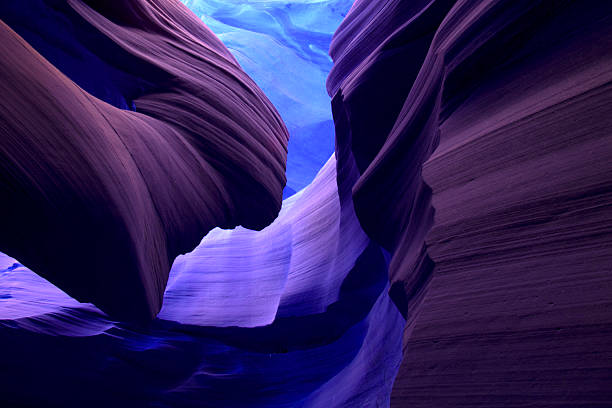

In [37]:
imgI

In [38]:
img2 = imgI.reshape((-1,3))

In [39]:
img2

array([[ 1,  0, 44],
       [ 1,  0, 44],
       [ 2,  0, 46],
       ...,
       [ 6,  0, 38],
       [ 6,  0, 38],
       [ 6,  0, 38]], dtype=uint8)

In [40]:
img2 = np.float32(img2)

In [41]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [49]:
k=5

In [50]:
attempts = 10

In [51]:
ret, label , center = cv2.kmeans(img2, k, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)

In [54]:
center = np.uint8(center)

In [53]:
res = center[label.flatten()]
res2 = res.reshape((imgI.shape))
cv2.imwrite("/segmented.jpg", res2)

True

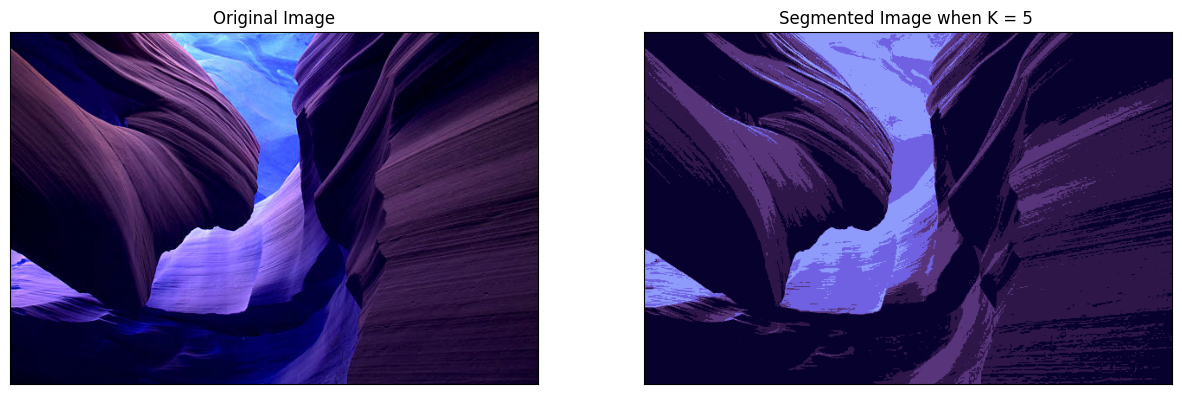

In [55]:
figure_size = 15
plt.figure(figsize=(figure_size, figure_size))
plt.subplot(1,2,1)
plt.imshow(imgI)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2)
plt.imshow(res2)
plt.title('Segmented Image when K = %i ' %k ),plt.xticks([]), plt.yticks([])
plt.show()

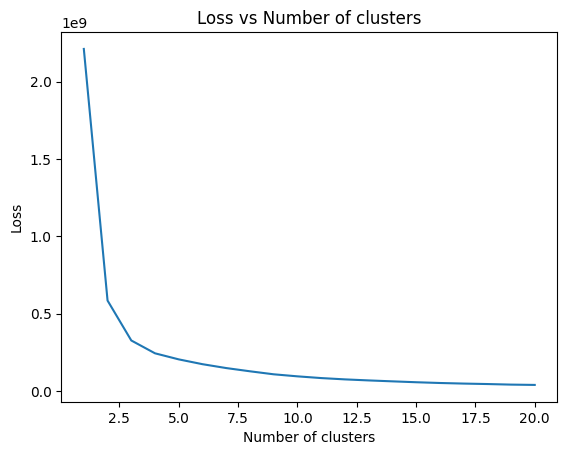

In [56]:
loss = []
for i in range(1,21):
  ret,label,center = cv2.kmeans(img2, i, None, criteria, attempts, cv2.KMEANS_PP_CENTERS)
  loss.append(ret)


plt.plot(range(1,21),loss)
plt.xlabel('Number of clusters')
plt.ylabel('Loss')
plt.title('Loss vs Number of clusters')
plt.show()